# Augmenting a dataset for object detection in YOLO

In this notebook, we illustrate how CLODSA can be employed to augment a dataset of images devoted to object detection using the [YOLO format](https://pjreddie.com/darknet/yolo/). In particular, we use a subset of the [Pascal VOC dataset](http://host.robots.ox.ac.uk/pascal/VOC/). We will use 20 images from that dataset. Such a subset can be downloaded by executing the following command. 

In [ ]:
!wget https://www.dropbox.com/s/7j00clf7tmn1ilm/PascalVOCYOLO.zip?dl=0 -O PascalVOCYOLO.zip
!unzip PascalVOCYOLO.zip

We can check the amount of images in each one of the folders.

In [ ]:
print("Number of images in the folder")
!ls -1 PascalVOCYOLO/*.jpg | wc -l

Number of images in the folder
20


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import shutil

In [10]:
#Detect
source_folder = '/content/drive/MyDrive/CS331_Nhóm/Augmentation_Data/Augmented_Detect/Image/'
source_folder_2 = '/content/drive/MyDrive/CS331_Nhóm/Augmentation_Data/Augmented_Detect/Label/'
destination_folder = '/content/drive/MyDrive/CS331_Nhóm/Augmentation_Data/data_detect/'

# fetch all files
for file_name in os.listdir(source_folder):
    # construct full file path
    source = source_folder + file_name
    destination = destination_folder + file_name
    # copy only files
    if os.path.isfile(source):
        shutil.copy(source, destination)
        print('copied', file_name)
        
# fetch all files
for file_name in os.listdir(source_folder_2):
    # construct full file path
    source = source_folder_2 + file_name
    destination = destination_folder + file_name
    # copy only files
    if os.path.isfile(source):
        shutil.copy(source, destination)
        print('copied', file_name)
# ************************************************************************
#Recog
source_folder = '/content/drive/MyDrive/CS331_Nhóm/Augmentation_Data/Augmented_Recog/Image/'
source_folder_2 = '/content/drive/MyDrive/CS331_Nhóm/Augmentation_Data/Augmented_Recog/Label/'
destination_folder = '/content/drive/MyDrive/CS331_Nhóm/Augmentation_Data/data_recog/'

# fetch all files
for file_name in os.listdir(source_folder):
    # construct full file path
    source = source_folder + file_name
    destination = destination_folder + file_name
    # copy only files
    if os.path.isfile(source):
        shutil.copy(source, destination)
        print('copied', file_name)
        
# fetch all files
for file_name in os.listdir(source_folder_2):
    # construct full file path
    source = source_folder_2 + file_name
    destination = destination_folder + file_name
    # copy only files
    if os.path.isfile(source):
        shutil.copy(source, destination)
        print('copied', file_name)
# ************************************************************************

Streaming output truncated to the last 5000 lines.
copied 836_3_59.jpg
copied 825_3_1079.jpg
copied 844_3_1438.jpg
copied 834_1_418.jpg
copied 844_2_1438.jpg
copied 840_1_1206.jpg
copied 814_2_344.jpg
copied 819_3_1656.jpg
copied 837_0_694.jpg
copied 840_0_1206.jpg
copied 835_0_1214.jpg
copied 833_3_1227.jpg
copied 843_0_1017.jpg
copied 844_0_1438.jpg
copied 829_0_845.jpg
copied 816_3_290.jpg
copied 826_1_1409.jpg
copied 815_2_457.jpg
copied 837_1_694.jpg
copied 823_1_200.jpg
copied 825_2_1079.jpg
copied 820_3_1667.jpg
copied 814_3_344.jpg
copied 843_1_1017.jpg
copied 838_3_1096.jpg
copied 817_1_1050.jpg
copied 818_0_1595.jpg
copied 841_2_953.jpg
copied 833_2_1227.jpg
copied 823_3_200.jpg
copied 848_1_394.jpg
copied 815_1_457.jpg
copied 832_0_1578.jpg
copied 843_2_1017.jpg
copied 848_0_394.jpg
copied 823_2_200.jpg
copied 839_0_314.jpg
copied 825_1_1079.jpg
copied 836_1_59.jpg
copied 832_2_1578.jpg
copied 811_3_1103.jpg
copied 824_1_1740.jpg
copied 832_1_1578.jpg
copied 841_1_953.jpg
co

FileNotFoundError: ignored

In [11]:
# len(os.listdir('/content/drive/MyDrive/CS331_Nhóm/Augmentation_Data/data_recog/'))
len(os.listdir('/content/drive/MyDrive/CS331_Nhóm/Augmentation_Data/data_detect/'))

8384

## Augmentation techniques

In this notebook, we will use the following augmentation techniques:
- Vertical, horizontal, and vertical-horizontal flips.
- 180º Rotation.
- Average blurring.
- Raise the hue value. 

## Installing the necessary libraries

In case that CLODSA is not installed in your system, the first task consists in installing it using ``pip``.

In [3]:
!pip install clodsa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 6.8 MB/s 
     |████████████████████████████████| 276 kB 43.5 MB/s 
  Created wheel for clodsa: filename=clodsa-1.2.47-py2.py3-none-any.whl size=74310 sha256=2d2d4e7186b922667d17c278b2571099db82c805dad4d0f21776671979ea2975
  Stored in directory: /root/.cache/pip/wheels/05/ff/0a/0e6e14c2a68d6869a010e979b8fd9d669aaeaa2d8b29de394f
  Created wheel for commentjson: filename=commentjson-0.9.0-py3-none-any.whl size=12092 sha256=cd13e6cea9ded13e8a736a35049cfa96213eaf64c1ac6fb72543cd43be5041e4
  Stored in directory: /root/.cache/pip/wheels/eb/bb/07/25a7f0718ee3fe137384011b8e56070f91cf950ee6047c287f
  Created wheel for lark-parser: filename=lark_parser-0.7.8-py2.py3-none-any.whl size=62527 sha256=cf5f244f0f9b039bf739cfaa78b122fbcc6e7e50f1c30d42a5ef05e60ab26f74
  Stored in directory: /root/.cache/pip/wheels/92/e3/af/1dc0fdca93232d700ac176af6554cf22b85f3

## Loading the necessary libraries

The first step in the pipeline consists in loading the necessary libraries to apply the data augmentation techniques in CLODSA. We also load some libraries to show the results.

In [4]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import xml.etree.ElementTree as ET
import cv2
%matplotlib inline

In [ ]:
!unzip /content/drive/MyDrive/CS331_Nhóm/Augmentation_Data/augmented_data_train_detect_rename.zip -d /content/drive/MyDrive/CS331_Nhóm/Augmentation_Data/data_detect

## Creating the augmentor object

As explained in the documentation of CLODSA, we need to specify some parameters for the augmentation process, and use them to create an augmentor object.  

_The kind of problem_. In this case, we are working in a detection problem

In [5]:
PROBLEM = "detection"

_The annotation mode_. We use the YOLO format. 

In [6]:
ANNOTATION_MODE = "yolo"

_The input path_. The input path containing the images. 

In [12]:
INPUT_PATH = '/content/drive/MyDrive/CS331_Nhóm/Augmentation_Data/data_detect/'

_The generation mode_. In this case, linear, that is, all the augmentation techniques are applied to all the images of the original dataset. 

In [13]:
GENERATION_MODE = "linear"

_The output mode_. The generated images will be stored in a new folder called augmented_images.  

In [14]:
OUTPUT_MODE = "yolo"
OUTPUT_PATH= "augmented_data_train_detect"

Using the above information, we can create our augmentor object. 

In [15]:
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})

## Adding the augmentation techniques

Now, we define the techniques that will be applied in our augmentation process and add them to our augmentor object. To illustrate the transformations, we will use the following image of the dataset. 



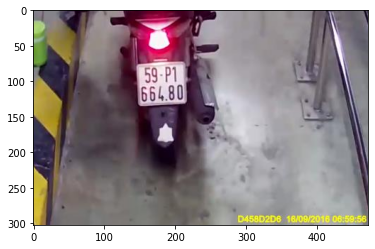

In [ ]:
img = cv2.imread("/content/drive/MyDrive/CS331_Nhóm/test/detect/0.jpg")
# changing to the BGR format of OpenCV to RGB format for matplotlib
plt.imshow(img[:,:,::-1])

Just for showing the results of applying data augmentation in an object detection problem, we define a function to read the annotations and another one to show them. This funcionality is not necessary when using CLODSA since it is already implemented in there. 

In [16]:
def boxesFromYOLO(imagePath,labelPath):
    image = cv2.imread(imagePath)
    (hI, wI) = image.shape[:2]
    lines = [line.rstrip('\n') for line in open(labelPath)]
    #if(len(objects)<1):
    #    raise Exception("The xml should contain at least one object")
    boxes = []
    if lines != ['']:
        for line in lines:
            components = line.split(" ")
            category = components[0]
            x  = int(float(components[1])*wI - float(components[3])*wI/2)
            y = int(float(components[2])*hI - float(components[4])*hI/2)
            h = int(float(components[4])*hI)
            w = int(float(components[3])*wI)
            boxes.append((category, (x, y, w, h)))
    return (image,boxes)

In [17]:
categoriesColors = {11: (255,0,0),14:(0,0,255)}

def showBoxes(image,boxes, name = ' ' , save = False):
    cloneImg = image.copy()
    for box in boxes:
        if(len(box)==2):
            (category, (x, y, w, h))=box
        else:
            (category, (x, y, w, h),_)=box
        if int(category) in categoriesColors.keys():
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),(255,0,0),0)
        else:
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),(0,255,0),0)
    plt.imshow(cloneImg[:,:,::-1])
    if (save):
      plt.imsave('/content/drive/MyDrive/CS331_Nhóm/test/output/{}.jpg'.format(name), cloneImg[:,:,::-1])
    

Now, we show the annotation of the image.

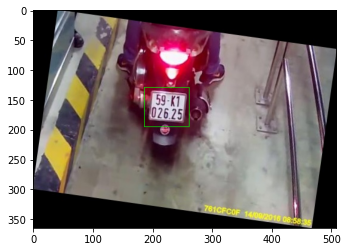

In [20]:
img,boxes = boxesFromYOLO('/content/drive/MyDrive/CS331_Nhóm/Augmentation_Data/data_detect/0_0_565.jpg',"/content/drive/MyDrive/CS331_Nhóm/Augmentation_Data/data_detect/0_0_565.txt")
showBoxes(img,boxes)

First of all, we must define a transformer generator.

In [21]:
transformer = transformerGenerator(PROBLEM)

#### Vertical flip

In [ ]:
vFlip = createTechnique("flip",{"flip":0})
augmentor.addTransformer(transformer(vFlip))

Showing the result of applying the transformation.

[('5', (9, 24, 8, 16), 1.0), ('9', (15, 25, 5, 16), 1.0), ('20', (24, 25, 6, 16), 1.0), ('2', (31, 23, 6, 18), 1.0), ('1', (6, 7, 6, 16), 1.0), ('2', (11, 7, 8, 16), 1.0), ('3', (18, 7, 8, 16), 1.0), ('1', (27, 7, 5, 16), 1.0), ('9', (32, 8, 8, 16), 1.0)]


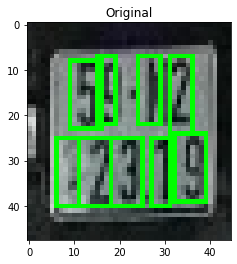

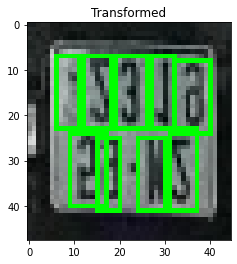

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
vFlipGenerator = transformer(vFlip)
vFlipImg,vFlipBoxes = vFlipGenerator.transform(img,boxes)
plt.figure()
print(vFlipBoxes)
plt.title("Transformed")
showBoxes(vFlipImg,vFlipBoxes)

#### Horizontal flip

In [ ]:
hFlip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(hFlip))

Showing the result of applying the transformation.

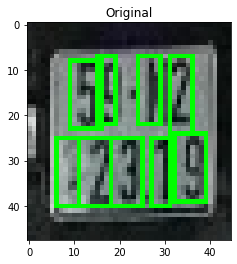

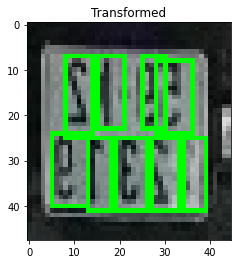

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hFlipGenerator = transformer(hFlip)
hFlipImg,hFlipBoxes = hFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hFlipImg,hFlipBoxes,'hflip',True)

#### Horizontal and vertical flip

In [ ]:
hvFlip = createTechnique("flip",{"flip":-1})
augmentor.addTransformer(transformer(hvFlip))

Showing the result of applying the transformation.

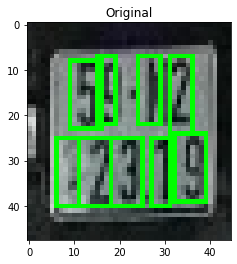

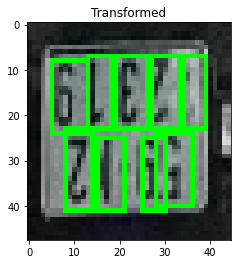

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hvFlipGenerator = transformer(hvFlip)
hvFlipImg,hvFlipBoxes = hvFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hvFlipImg,hvFlipBoxes,'hvflip',True)

#### Rotation:

In [22]:
rotate = createTechnique("rotate", {"angle" : 8})
augmentor.addTransformer(transformer(rotate))
rotate2 = createTechnique("rotate", {"angle" : -8})
augmentor.addTransformer(transformer(rotate2))

Showing the result of applying the transformation.

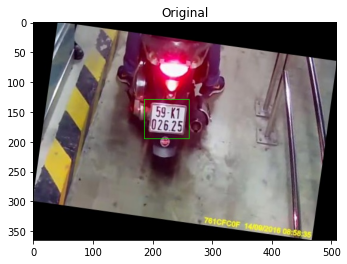

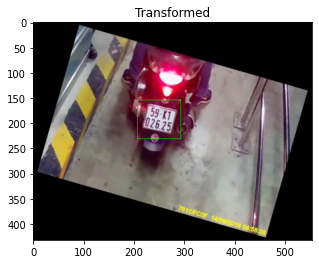

In [23]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
rotateGenerator = transformer(rotate)
rotateImg,rotateBoxes = rotateGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(rotateImg,rotateBoxes,'rotate8')

#### Average blurring

In [ ]:
avgBlur =  createTechnique("average_blurring", {"kernel" : 3})
augmentor.addTransformer(transformer(avgBlur))

Showing the result of applying the transformation.

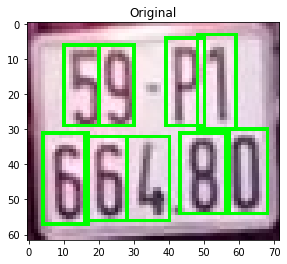

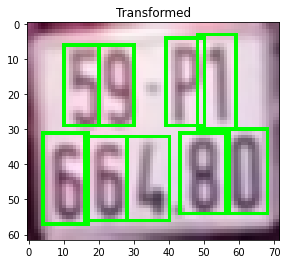

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
avgBlurGenerator = transformer(avgBlur)
avgBlurImg,avgBlurBoxes = avgBlurGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(avgBlurImg,avgBlurBoxes,'blur',True)

#### Raise Hue

In [ ]:
hue = createTechnique("raise_hue", {"power" : 3})
augmentor.addTransformer(transformer(hue))

Showing the result of applying the transformation.

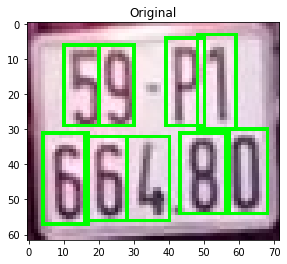

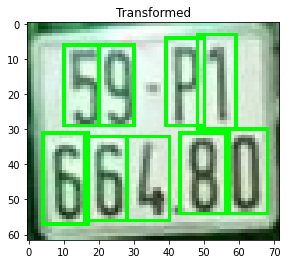

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hueGenerator = transformer(hue)
hueImg,hueBoxes = hueGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hueImg,hueBoxes,'hue',True)

#### None
(to keep also the original image)

In [ ]:
none = createTechnique("none",{})
augmentor.addTransformer(transformer(none))

## Applying the augmentation process

Finally, we apply the augmentation process (this might take some time depending on the number of images of the original dataset and the number of transformations that will be applied). 

In [ ]:
augmentor.applyAugmentation()

Finally, we can check the amount of images in the output folder.

In [ ]:
print("Number of images in the folder")
!ls -1 augmented_data_train_detect/*.jpg | wc -l
print("Number of annotations in the folder")
!ls -1 augmented_data_train_detect/*.txt | wc -l

Number of images in the folder
4192
Number of annotations in the folder
4192


In [ ]:
If you are executing this notebook in Colaboratory, you need to download the generated files. To that aim, you can create a zip folder and download it using the following commands. 

SyntaxError: ignored

In [ ]:
!zip -r augmented_data_train_detect.zip augmented_data_train_detect
from google.colab import files
files.download('augmented_data_train_detect.zip')

Streaming output truncated to the last 5000 lines.
  adding: augmented_data_train_detect/700_2_1026.txt (deflated 40%)
  adding: augmented_data_train_detect/42_1_1172.txt (deflated 28%)
  adding: augmented_data_train_detect/634_2_1705.jpg (deflated 1%)
  adding: augmented_data_train_detect/683_0_1335.jpg (deflated 1%)
  adding: augmented_data_train_detect/513_1_1142.jpg (deflated 1%)
  adding: augmented_data_train_detect/66_1_1420.txt (deflated 31%)
  adding: augmented_data_train_detect/378_0_723.jpg (deflated 1%)
  adding: augmented_data_train_detect/265_0_1447.jpg (deflated 1%)
  adding: augmented_data_train_detect/749_0_797.jpg (deflated 1%)
  adding: augmented_data_train_detect/845_0_399.txt (deflated 30%)
  adding: augmented_data_train_detect/189_2_333.jpg (deflated 1%)
  adding: augmented_data_train_detect/948_1_561.jpg (deflated 1%)
  adding: augmented_data_train_detect/493_0_844.txt (deflated 29%)
  adding: augmented_data_train_detect/99_3_184.jpg (deflated 2%)
  adding: augmen

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>